# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data

In this module of the project we perform Exploratory Data Analysis and Feature Engineering.

### Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions

We will import the following libraries the lab 



In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# garbage collector
import gc

/home/luiz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Exploratory Data Analysis 


Reading SpaceX dataset into a Pandas dataframe and printing its summary

In [2]:
df = pd.read_csv("datasets/spaceX_wrangled.csv")
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963,0.666667
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093,1.000000


#### Relationship between `FlightNumber` and `Payload`.

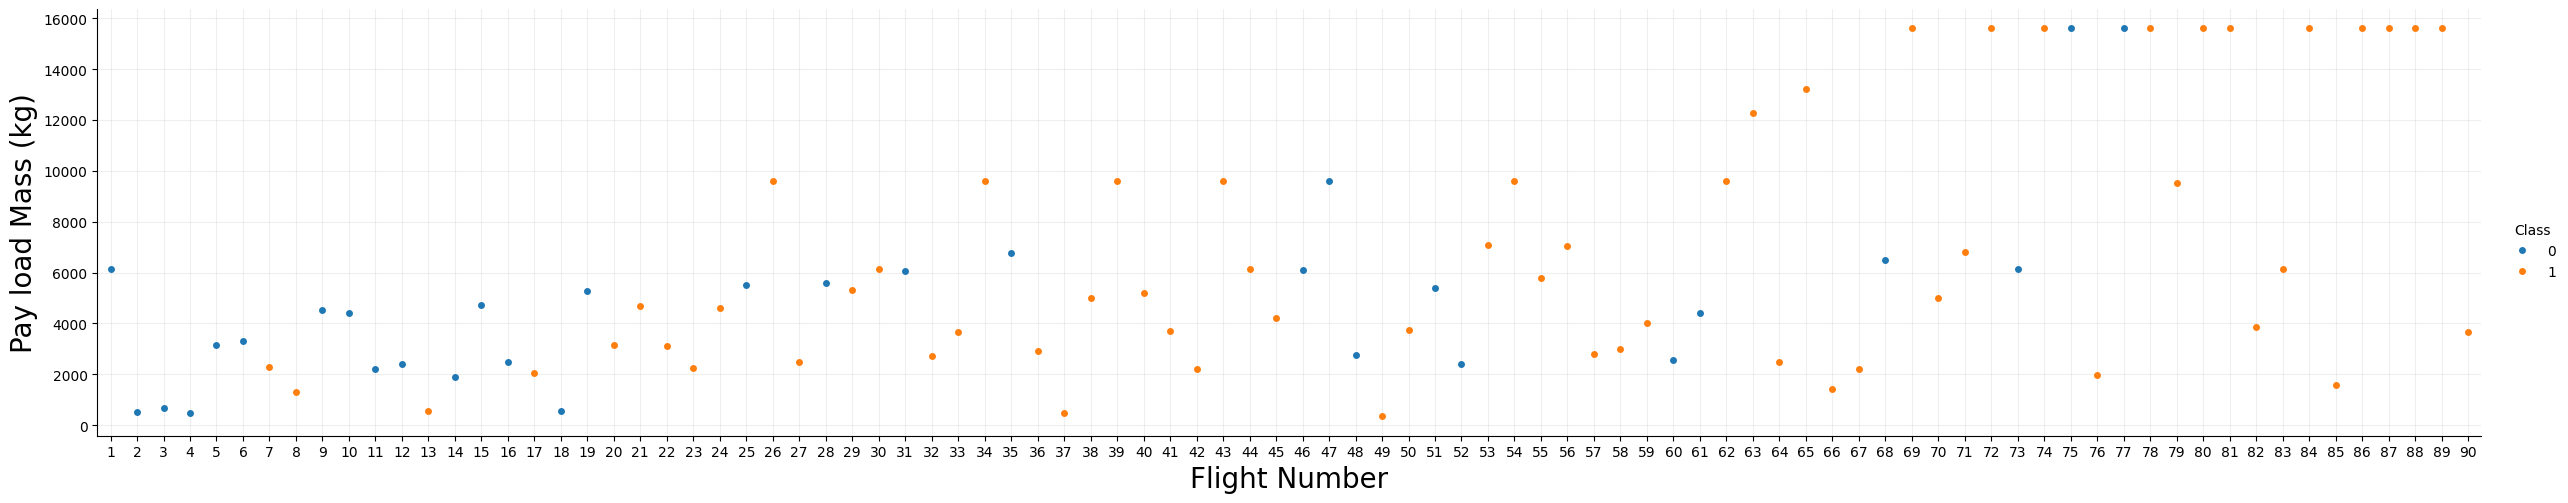

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.grid(alpha=0.2)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

#### Relationship between Flight Number and Launch Site


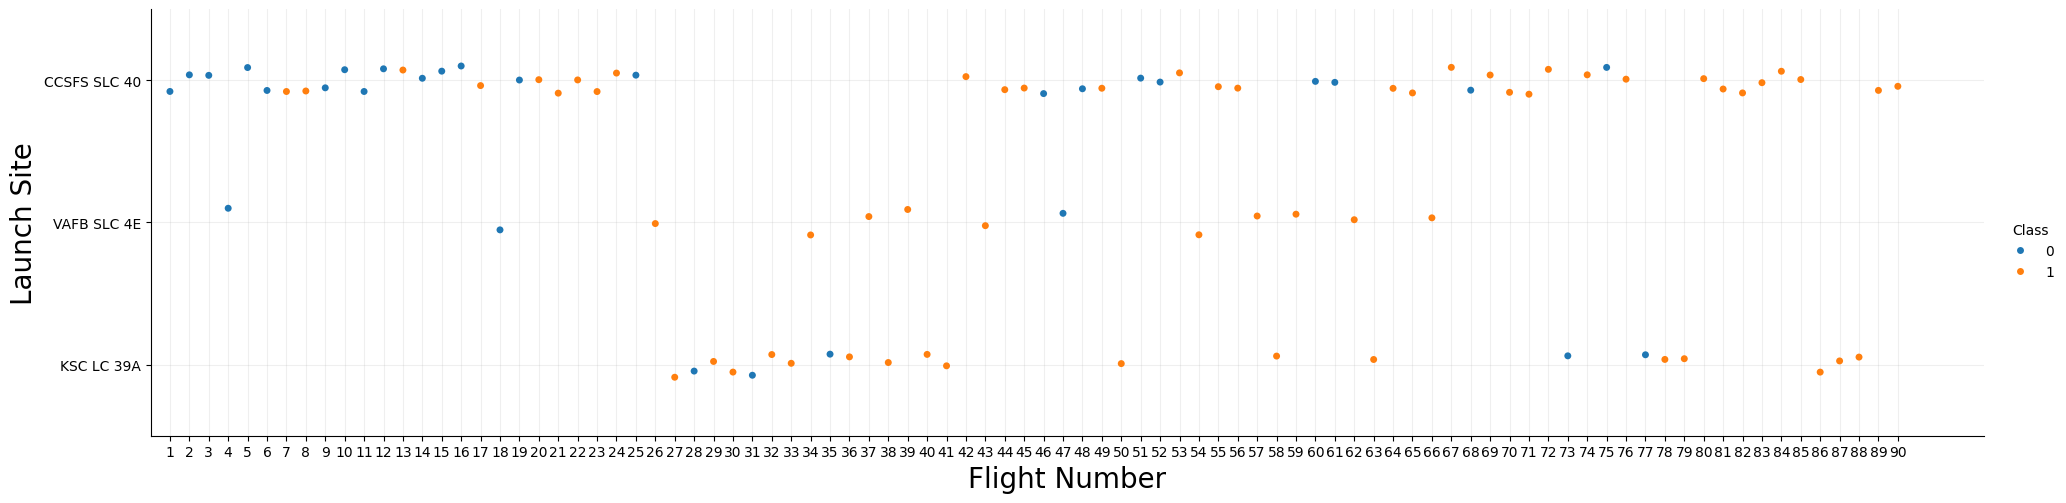

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(df, x='FlightNumber', y='LaunchSite', hue='Class', aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.grid(alpha=0.2)
plt.xticks(np.arange(df['FlightNumber'].min(), df['FlightNumber'].max()+1, 1))
plt.xlim(0,)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [5]:
df_percentage = df[['Class']].groupby(df['LaunchSite']).mean().reset_index()
df_percentage

,LaunchSite,Class
0,CCSFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> have a success rate of 77%.


#### Relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


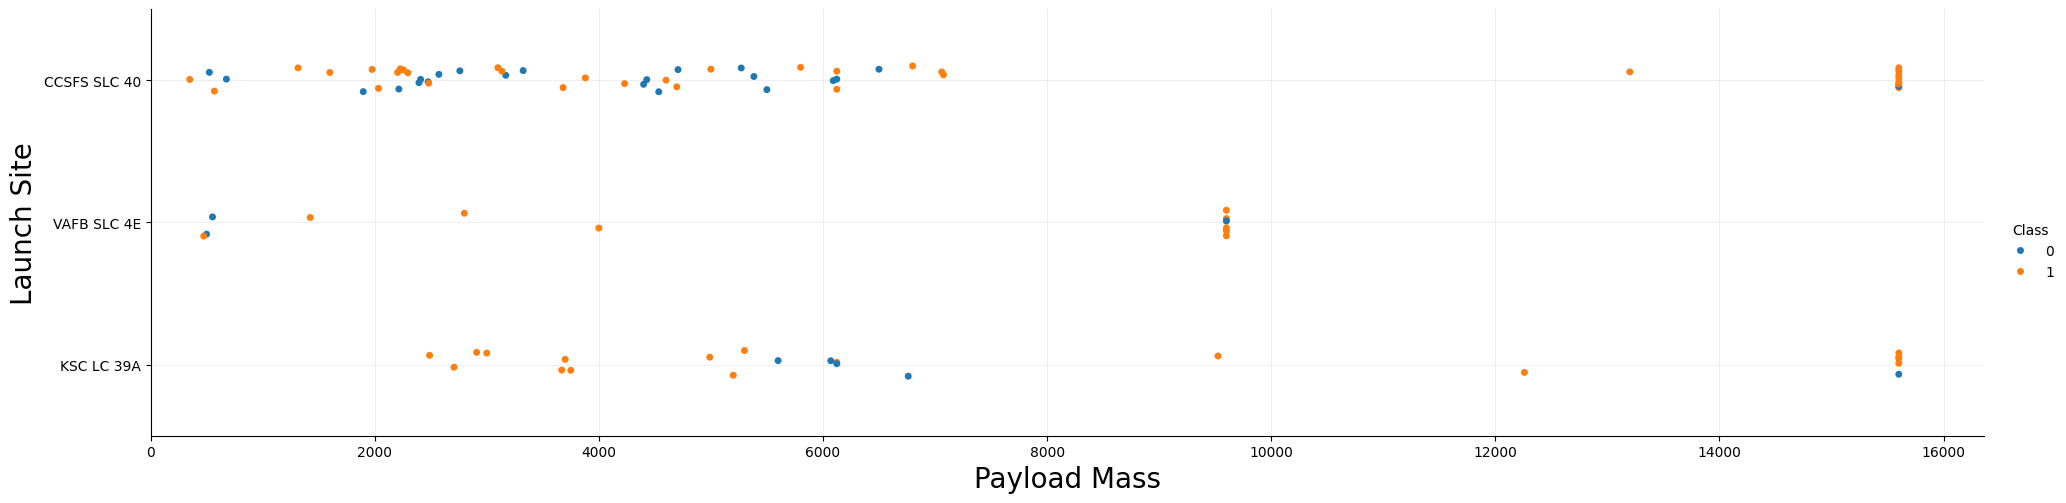

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(df, x='PayloadMass', y='LaunchSite', hue='Class', aspect=4)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.grid(alpha=0.2)
plt.xlim(0,)
plt.show()

For the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


#### Relationship between success rate of each orbit type


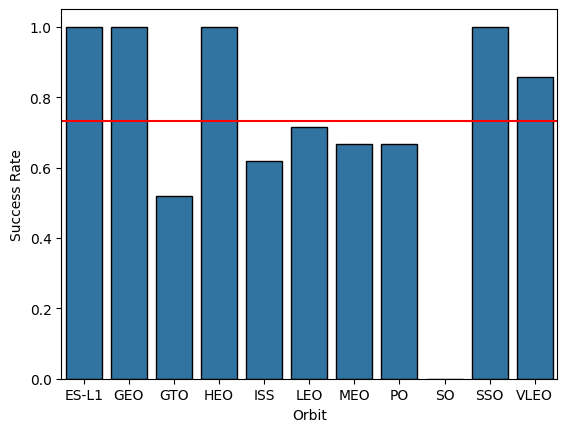

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
df_orbit_vs_success = df[['Class']].groupby(df['Orbit']).mean().reset_index()
graph = sns.barplot(df, x=df_orbit_vs_success.Orbit, y=df_orbit_vs_success.Class, edgecolor='black')
graph.axhline(df_orbit_vs_success.Class.mean(), color='red')
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()

- ES-L1, GEO, HEO and SSO have 100% success Rate.
- ES-L1, GEO, HEO, SSO and VLEO has a success rate above average.
- SO has no success rate, but it consists of only one launch. 

#### Creating a radar plot for the success rate by orbit

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import mpl_toolkits 
from textwrap import wrap

df_orbit_vs_success2 = df[['Class']].groupby(df['Orbit']).mean().reset_index()
mean = df_orbit_vs_success2['Class'].mean()

# df_sorted = df_orbit_vs_success2.sort_values('Class', ascending=False)
df_sorted = df_orbit_vs_success2

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["Class"].values

# # Mean gain length
MEAN_GAIN = [mean]*len(df_sorted["Class"].values)

# Region label
REGION = df_sorted["Orbit"].values

# # Number of tracks per region
TRACKS_N = df_sorted["Class"].values

In [ ]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "serif"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

Text(0.5, 1.0, 'Success Rate by Orbit')

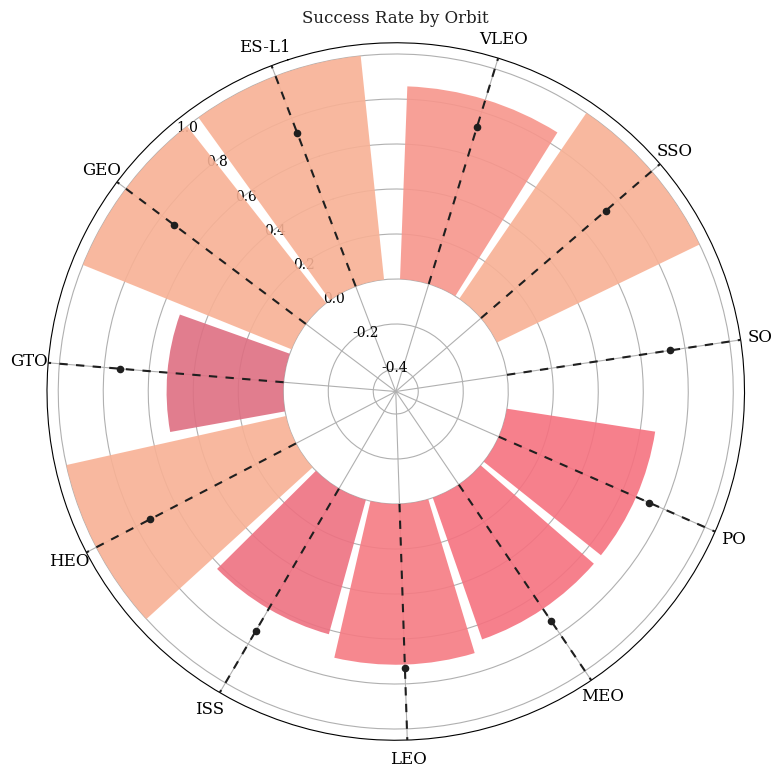

In [ ]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-0.5, 1.05)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=20, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12)
ax.set_title('Success Rate by Orbit')


#### Relationship between FlightNumber and Orbit type

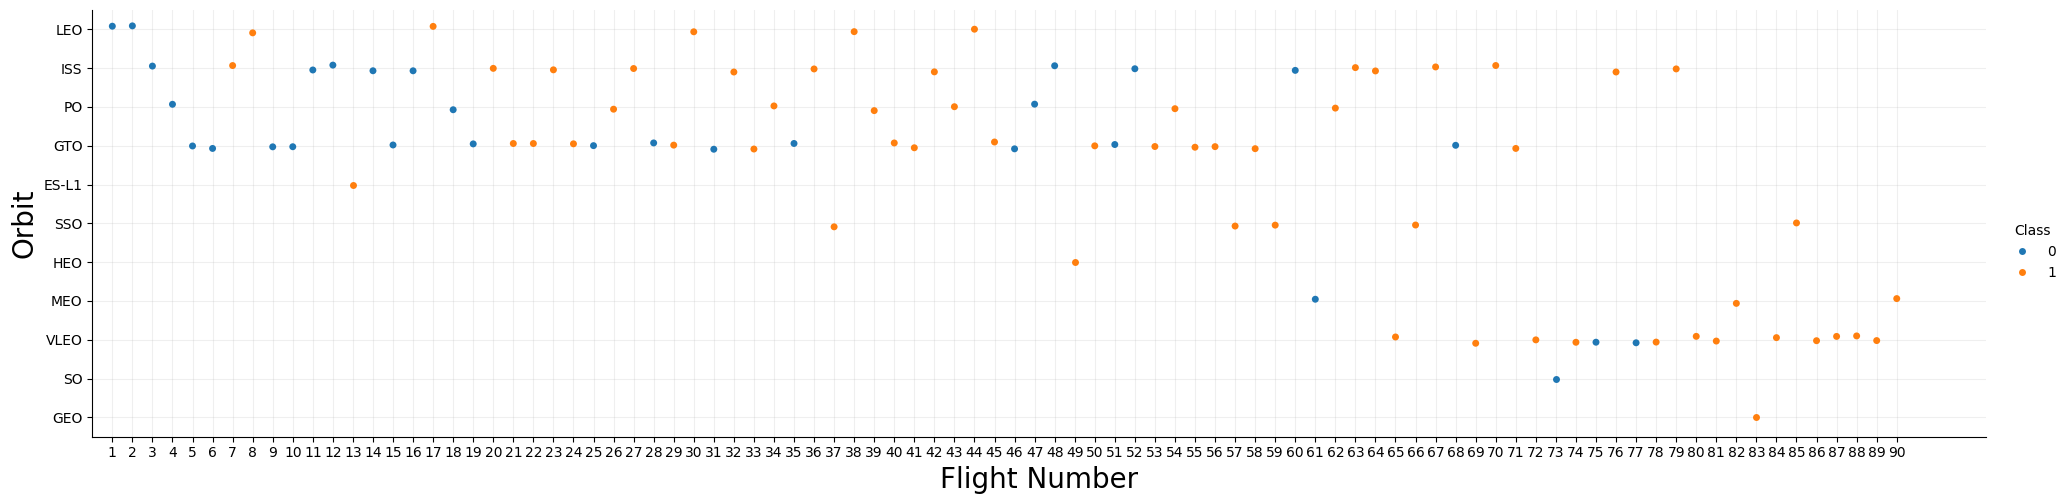

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(df, x='FlightNumber', y='Orbit', hue='Class', aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid(alpha=0.2)
plt.xticks(np.arange(df['FlightNumber'].min(), df['FlightNumber'].max()+1, 1))
plt.xlim(0,)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


#### Relationship between Payload and Orbit type

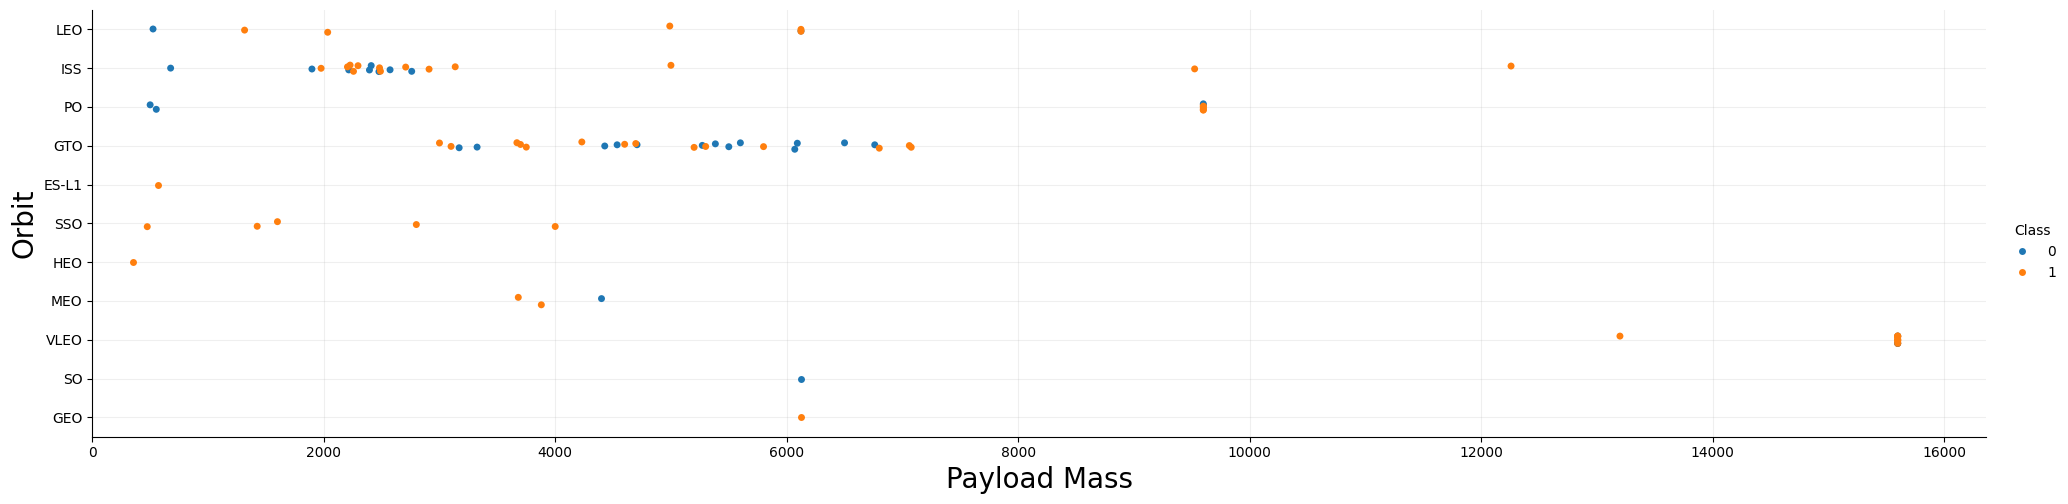

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(df, x='PayloadMass', y='Orbit', hue='Class', aspect=4)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid(alpha=0.2)
# plt.xticks(np.arange(df['FlightNumber'].min(), df['FlightNumber'].max()+1, 1))
plt.xlim(0,)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




#### Launch success yearly trend

In [10]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in date:
        year.append(i.split("-")[0])
    return year
    

In [11]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

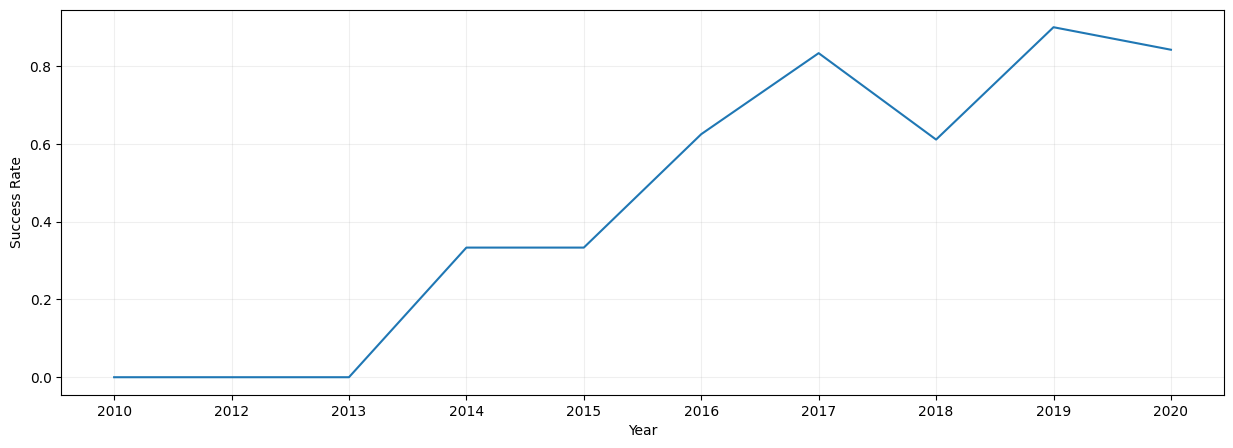

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year=[]
year = Extract_year(df["Date"])
df['Year'] = year

# success_rate = df['Class'].groupby('Year').mean()
fig = plt.figure(figsize=(15,5))
plt.plot(df['Year'].unique(), df['Class'].groupby(df['Year']).mean())
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(alpha=0.2)
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

## Features Engineering 


Filtering relevant data:

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 #### Creating dummy variables to categorical columns

In [20]:
dummy_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=dummy_columns, dtype=float)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,525.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,677.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,500.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3170.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Casting all numeric columns to `float64`

In [21]:
features_one_hot = features_one_hot.astype(float)

In [23]:
features_one_hot.to_csv('datasets/spaceX_EDA.csv', index=False)